In [1]:
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
DATA_FOLDER = "/home/jacob/Documents/piet/data"
DATA_FILE = os.path.join(DATA_FOLDER, "sparse_matrix.npz")
COLUMNS_FILE = os.path.join(DATA_FOLDER, "names.csv")
LABELS_FILE =  os.path.join(DATA_FOLDER, "labels.csv")

In [3]:
data = scipy.sparse.load_npz(DATA_FILE)
names = pd.read_csv(COLUMNS_FILE, header=None)
labels = pd.read_csv(LABELS_FILE, header=None)

1    6175965
dtype: int64


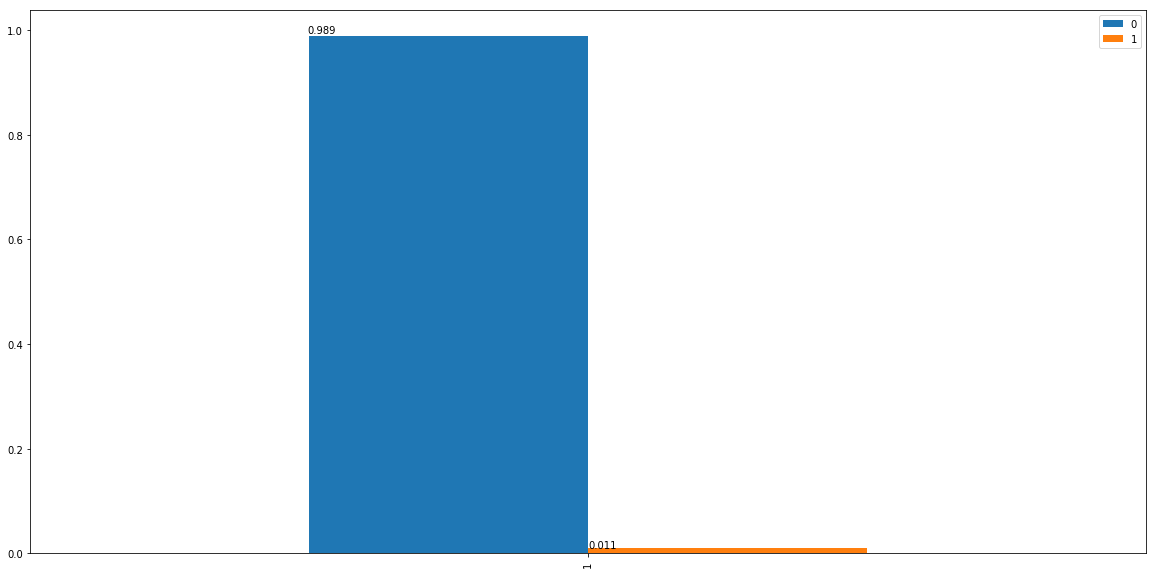

In [4]:
class_dist = pd.DataFrame(np.unique(labels, return_counts=True))
class_dist = class_dist.reindex(class_dist.index.drop(0))
print(class_dist.sum(axis=1))
ax = class_dist.divide(class_dist.sum(axis=1).values[0]).plot.bar()
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [5]:
class_dist.divide(class_dist.sum(axis=1))

0         1
1 NaN  0.010966

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.95, random_state=42)
train_index, test_index = next(sss.split(data, labels))

In [7]:
y = labels.iloc[train_index]
X = pd.DataFrame(data[train_index].todense(), columns=names[1:].values.flatten())
X.head()

journey_time_spent  journey_num_sessions  \
0            0.000000              0.693147   
1            0.000000              0.693147   
2            2.564949              0.693147   
3            0.000000              0.693147   
4            2.564949              0.693147   

   journey_num_unique_marketing_channels  journey_num_pages  \
0                               0.693147                0.5   
1                               0.693147                1.0   
2                               0.693147                0.5   
3                               0.693147                1.0   
4                               0.693147                1.0   

   journey_num_page_views  journey_num_unique_start_hour  journey_time_gap  \
0                0.693147                            1.0               0.0   
1                0.693147                            1.0               0.0   
2                1.791759                            1.0               0.0   
3                0.693147                            1.0               0.0   
4                1.945910                            1.0               0.0   

   marketing_channel_affiliates  marketing_channel_branded_paid_search  \
0                           0.0                                    0.0   
1                           0.0                                    0.0   
2                           0.0                                    0.0   
3                           0.0                                    0.0   
4                           0.0                                    0.0   

   marketing_channel_direct  ...  start_hour_vect_h21  start_hour_vect_h22  \
0                       1.0  ...                  0.0                  0.0   
1                       1.0  ...                  0.0                  0.0   
2                       1.0  ...                  0.0                  0.0   
3                       0.0  ...                  0.0                  0.0   
4                       1.0  ...                  0.0                  0.0   

   start_hour_vect_h23  start_hour_vect_h3  start_hour_vect_h4  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   start_hour_vect_h5  start_hour_vect_h6  start_hour_vect_h7  \
0                 0.0                 0.0                 0.0   
1                 0.0                 1.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   start_hour_vect_h8  start_hour_vect_h9  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  

[5 rows x 46 columns]

In [8]:
X.describe()

journey_time_spent  journey_num_sessions  \
count       308798.000000         308798.000000   
mean             3.933221              0.971000   
std              2.845918              0.532993   
min              0.000000              0.693147   
25%              0.000000              0.693147   
50%              4.499810              0.693147   
75%              6.156979              1.098612   
max             14.353597              6.238325   

       journey_num_unique_marketing_channels  journey_num_pages  \
count                          308798.000000      308798.000000   
mean                                0.828057           0.819553   
std                                 0.262746           0.218372   
min                                 0.693147           0.000000   
25%                                 0.693147           0.666667   
50%                                 0.693147           0.924242   
75%                                 0.693147           1.000000   
max                                 2.639057           1.000000   

       journey_num_page_views  journey_num_unique_start_hour  \
count           308798.000000                  308798.000000   
mean                 1.849566                       1.762411   
std                  1.118370                       1.898957   
min                  0.000000                       1.000000   
25%                  0.693147                       1.000000   
50%                  1.609438                       1.000000   
75%                  2.397895                       2.000000   
max                  8.905444                      24.000000   

       journey_time_gap  marketing_channel_affiliates  \
count      3.087980e+05                 308798.000000   
mean       4.118500e+05                      0.077915   
std        1.367286e+06                      0.369120   
min        0.000000e+00                      0.000000   
25%        0.000000e+00                      0.000000   
50%        0.000000e+00                      0.000000   
75%        1.523675e+04                      0.000000   
max        2.353659e+07                     26.000000   

       marketing_channel_branded_paid_search  marketing_channel_direct  ...  \
count                          308798.000000             308798.000000  ...   
mean                                0.258075                  0.932804  ...   
std                                 1.337276                  3.536039  ...   
min                                 0.000000                  0.000000  ...   
25%                                 0.000000                  0.000000  ...   
50%                                 0.000000                  0.000000  ...   
75%                                 0.000000                  1.000000  ...   
max                               159.000000                504.000000  ...   

       start_hour_vect_h21  start_hour_vect_h22  start_hour_vect_h23  \
count        308798.000000        308798.000000        308798.000000   
mean              0.187786             0.151549             0.086911   
std               0.665187             0.586514             0.434677   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max              37.000000            34.000000            48.000000   

       start_hour_vect_h3  start_hour_vect_h4  start_hour_vect_h5  \
count       308798.000000       308798.000000       308798.000000   
mean             0.006237            0.006004            0.013196   
std              0.102179            0.105498            0.143392   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%     

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308798 entries, 0 to 308797
Data columns (total 46 columns):
journey_time_spent                       308798 non-null float64
journey_num_sessions                     308798 non-null float64
journey_num_unique_marketing_channels    308798 non-null float64
journey_num_pages                        308798 non-null float64
journey_num_page_views                   308798 non-null float64
journey_num_unique_start_hour            308798 non-null float64
journey_time_gap                         308798 non-null float64
marketing_channel_affiliates             308798 non-null float64
marketing_channel_branded_paid_search    308798 non-null float64
marketing_channel_direct                 308798 non-null float64
marketing_channel_direct_deals           308798 non-null float64
marketing_channel_display                308798 non-null float64
marketing_channel_email                  308798 non-null float64
marketing_channel_generic_paid_search    308

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
components = pca.fit_transform(X)

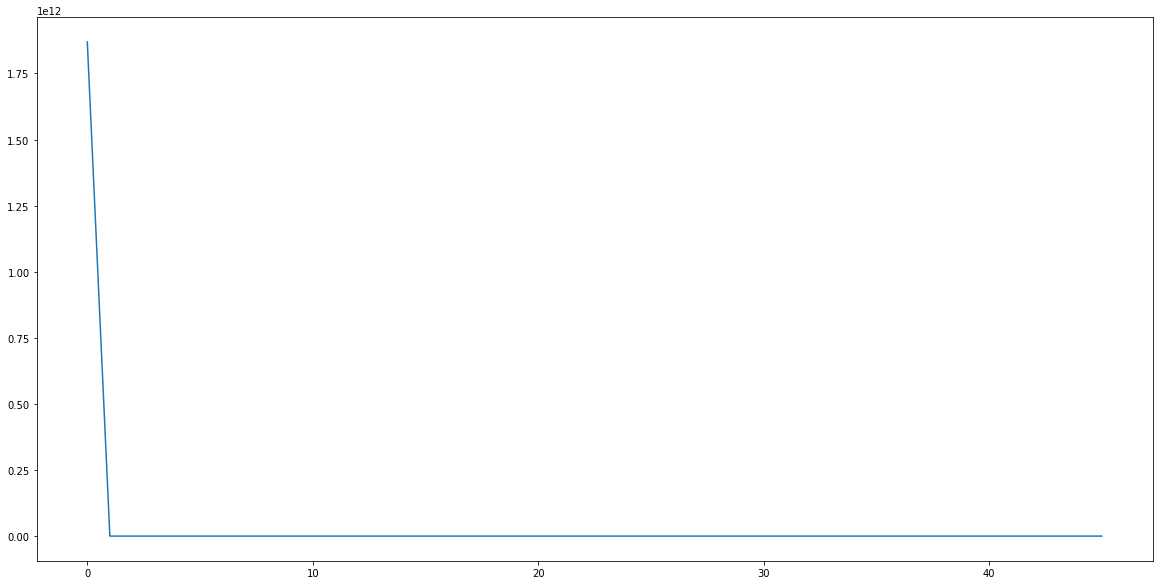

In [11]:
plt.plot(pca.explained_variance_)

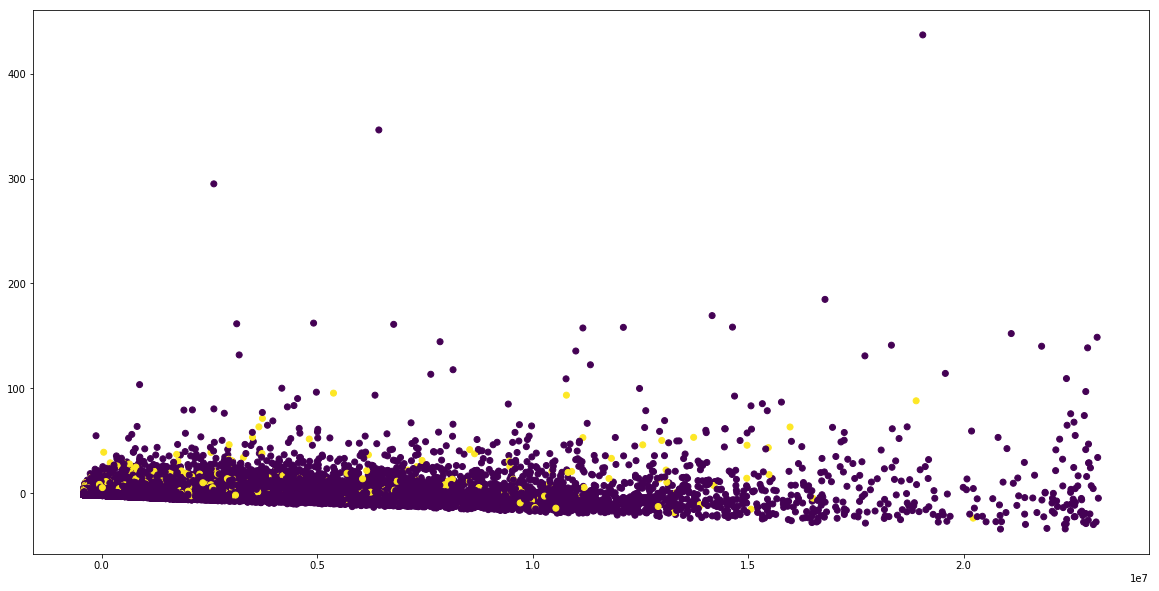

In [13]:
plt.scatter(components[:, 0], components[:,1], c=y.values.flatten())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
clf = GradientBoostingClassifier(n_estimators=100)
validation = cross_validate(clf, X, y.values.flatten(), scoring=['precision', 'recall', 'roc_auc', 'f1', 'accuracy'], cv=5)
pd.DataFrame(validation)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_components = lda.fit_transform(X, y.values.flatten())
lda.explained_variance_ratio_

/home/jacob/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([1.])

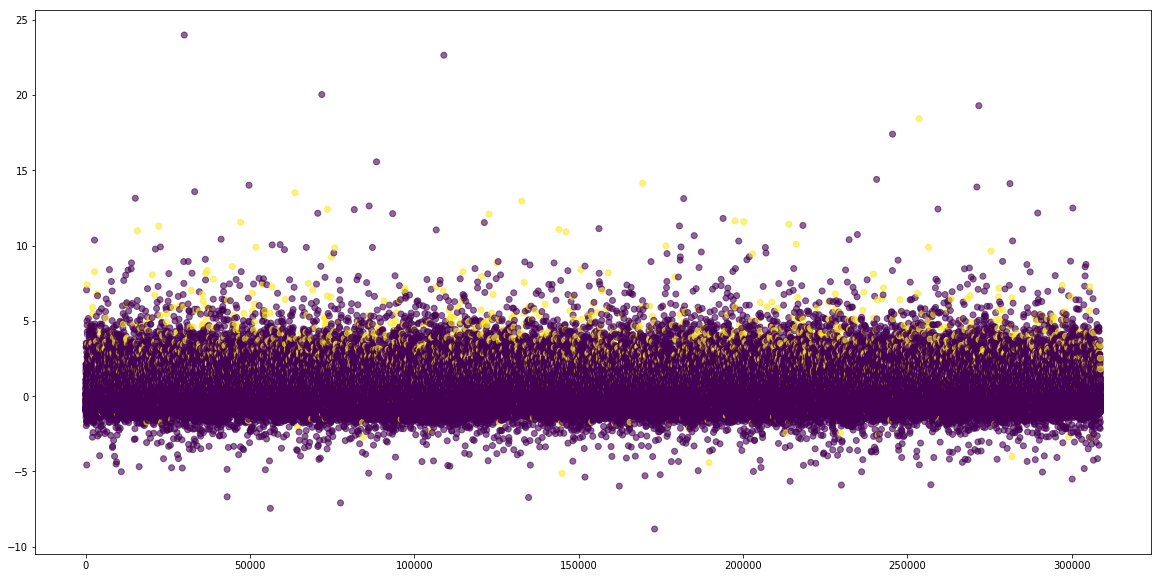

In [15]:
plt.scatter(range(len(lda_components)), lda_components, c=y.values.flatten(), alpha=.6)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=500)
validation = cross_validate(clf, lda_components, y.values.flatten(), scoring=['precision', 'recall', 'roc_auc', 'f1', 'accuracy'], cv=5)
pd.DataFrame(validation)

In [23]:
from sklearn import svm, neighbors, linear_model, ensemble
classifiers = [
    ('grad',  ensemble.GradientBoostingClassifier(n_estimators=100)),
    ("rf", ensemble.RandomForestClassifier(n_estimators=100, class_weight='balanced' ),),
    ('lsvc', svm.SVC(kernel='linear',class_weight='balanced')),
    ('rbfsvc', svm.SVC(kernel='rbf', class_weight='balanced')),
    ('knn',neighbors.KNeighborsClassifier()),
    ("lr", linear_model.LogisticRegression(class_weight='balanced')),
    ("sparcelr", linear_model.LogisticRegression(class_weight='balanced', penalty='l1')),
    ("ada", ensemble.AdaBoostClassifier(n_estimators=100)),
    ("if", ensemble.IsolationForest(n_estimators=100)),
]

clf = ensemble.VotingClassifier(estimators=classifiers, voting='hard')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y.values.flatten(), stratify=y.values.flatten(),  test_size=0.25)

clf.fit(X_train, y_train)
print("fitted")
y_pred = clf.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))